data is loated in the student directory
work with the student-mat.csv that contains data from student math courses.

[Link to dataset documentation](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

In [2]:
!ls -l ./student/

total 312
-rwxrwxrwx@ 1 ns  staff  56993 12 Apr  2012 student-mat.csv
-rw-r--r--@ 1 ns  staff    269 20 Jul  2015 student-merge.R
-rwxrwxrwx@ 1 ns  staff  93220 20 Jul  2015 student-por.csv
-rwxrwxrwx@ 1 ns  staff   3206 20 Jul  2015 student.txt


In [16]:
#standard package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

In [20]:
students = pd.read_csv('./student/student-mat.csv', sep=';')
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [21]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [22]:
students['traveltime']

0      2
1      1
2      1
3      1
4      1
      ..
390    1
391    2
392    1
393    3
394    1
Name: traveltime, Length: 395, dtype: int64

Plan for cleaning data

1. Columns in yes/no tanslate to True/False
2. Translate column Pstatus, address to True/False

Analysis - Investigation
1. Overview - total students, by sex and age (distributions)
2. Plot mean first, second, and final grade by studytime
3. Plot mean grade grouped by internet access

In [25]:
students.columns = [col.lower() for col in students.columns]
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')

In [27]:
# address', "pstatus"
true_false_cols = ['schoolsup',
                   'famsup',
                   'paid',
                   'activities',
                   'nursery',
                   'higher', 
                   'internet',
                   'romantic'] 

mapping = {'yes': True,
         'no': False}

for col in true_false_cols:
    students[col+'_mapped']=students[col].map(mapping)

In [28]:
students.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,g2,g3,schoolsup_mapped,famsup_mapped,paid_mapped,activities_mapped,nursery_mapped,higher_mapped,internet_mapped,romantic_mapped
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,6,6,True,False,False,False,True,True,False,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,6,False,True,False,False,False,True,True,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,8,10,True,False,True,False,True,True,True,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,14,15,False,True,True,True,True,True,True,True
4,GP,F,16,U,GT3,T,3,3,other,other,...,10,10,False,True,True,False,True,True,False,False


In [36]:
def parents_together_address(string):
    if string == 'A' or string =='R':
        return False
    elif string == 'T' or string =='U':
        return True

In [37]:
students['pstatus_tf']=students['pstatus'].apply(parents_together_address)
students['living_urban'] = students['address'].apply(parents_together_address)

In [39]:
#total students
students.shape

(395, 43)

In [42]:
#number of students male and female
students['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

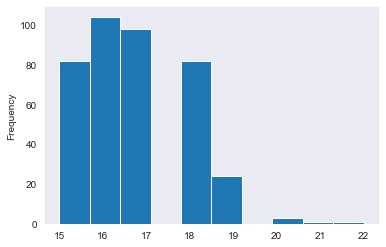

In [48]:
#number of students by age
students['age'].plot(kind='hist')

In [49]:
students['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

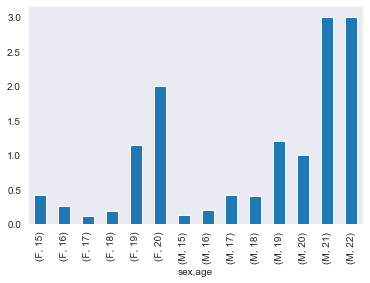

In [47]:
#so our mean failures is wrong...
students.groupby(['sex', 'age']).mean()['failures'].plot(kind='bar')

In [51]:
#Plot mean first, second, and final grade by studytime

students['studytime'].value_counts()

2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

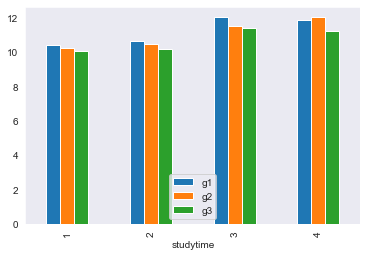

In [66]:
group = students.groupby('studytime')
group[['g1', 'g2', 'g3']].mean().plot(kind='bar')

In [59]:
group[['g1', 'g2', 'g3']].describe()

g1                                                       g2  \
           count       mean       std  min   25%   50%   75%   max  count   
studytime                                                                   
1          105.0  10.438095  3.554314  4.0   8.0  10.0  13.0  18.0  105.0   
2          198.0  10.651515  3.153400  3.0   8.0  10.0  13.0  19.0  198.0   
3           65.0  12.046154  3.043594  6.0  10.0  12.0  14.0  19.0   65.0   
4           27.0  11.888889  3.555422  7.0  10.0  11.0  14.5  19.0   27.0   

                      ...                 g3                                  \
                mean  ...   75%   max  count       mean       std  min   25%   
studytime             ...                                                      
1          10.276190  ...  13.0  19.0  105.0  10.047619  4.956311  0.0   8.0   
2          10.505051  ...  13.0  18.0  198.0  10.171717  4.217537  0.0   8.0   
3          11.507692  ...  14.0  18.0   65.0  11.400000  4.639504  0.0  10.0   
4          12.037037  ...  14.0  19.0   27.0  11.259259  5.281263  0.0   9.0   

                             
            50%   75%   max  
studytime                    
1          10.0  13.0  19.0  
2          11.0  13.0  19.0  
3          12.0  15.0  19.0  
4          12.0  14.5  20.0  

[4 rows x 24 columns]

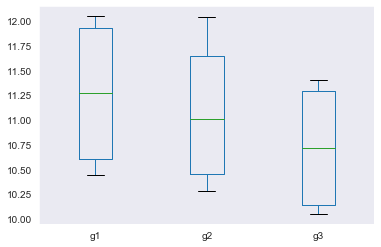

In [65]:
group = students.groupby('studytime')
group[['g1', 'g2', 'g3']].mean().plot(kind='box')